            fecha_hora tipo_crudo  caudal_crudo_m3h  temperatura_entrada_C  \
0  2024-01-01 00:00:00      medio            321.30                 368.73   
1  2024-01-01 01:00:00     pesado            278.44                 378.65   
2  2024-01-01 02:00:00      medio            337.52                 351.26   
3  2024-01-01 03:00:00      medio            323.82                 357.47   
4  2024-01-01 04:00:00    liviano            376.75                 352.13   

   temperatura_salida_C  presion_bar  consumo_energia_kwh  
0                180.00         3.47               291.12  
1                180.00         5.27               299.52  
2                159.37         4.00               307.91  
3                170.39         3.24               281.35  
4                168.62         3.31               348.30  

Resumen estadístico:
        caudal_crudo_m3h  temperatura_entrada_C  temperatura_salida_C  \
count        720.000000             720.000000            720.000000   
mean

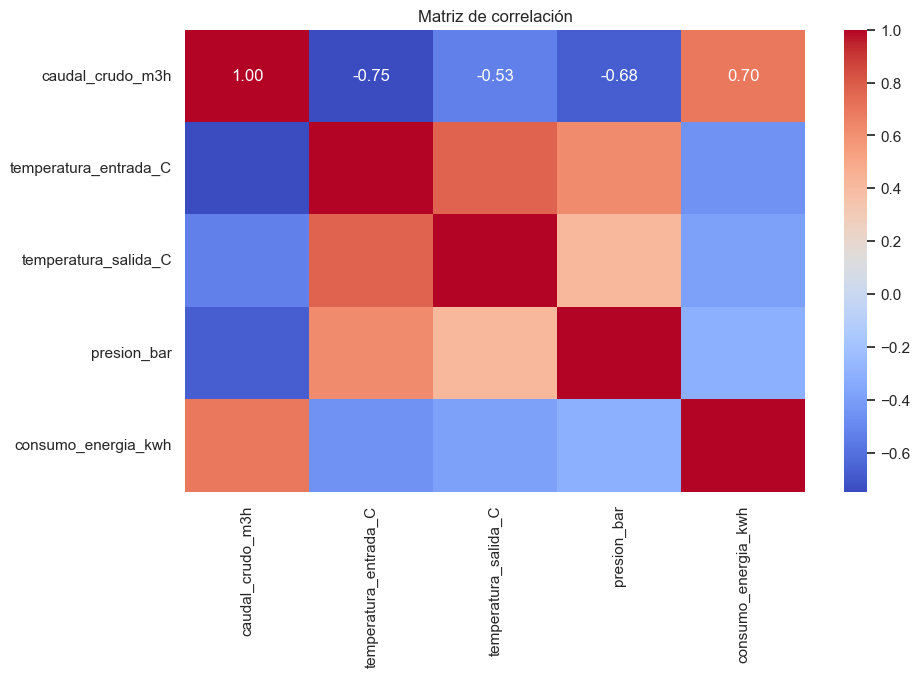

C:\Users\garib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


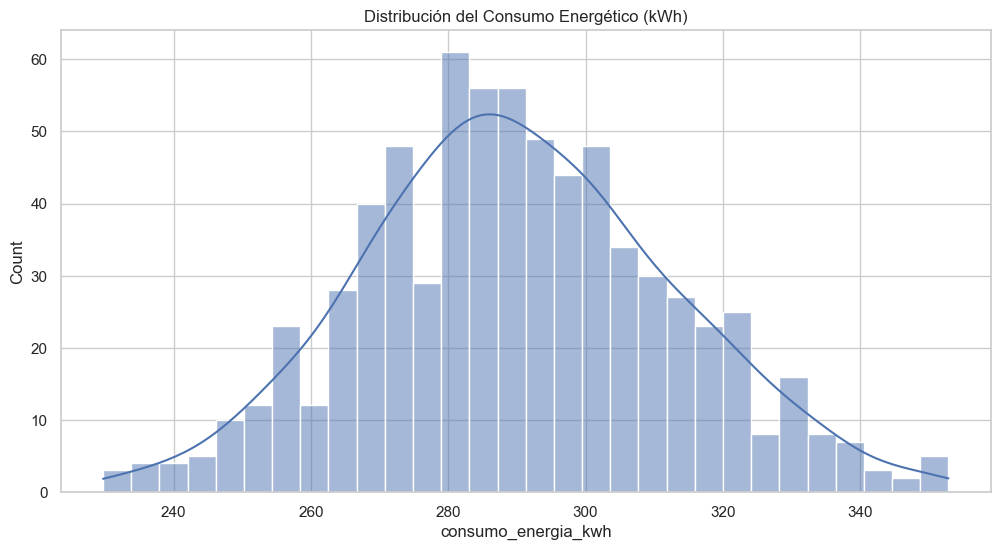


📌 Evaluación de Regresión Lineal:
MAE: 12.47
RMSE: 15.73
R2: 0.51

📌 Evaluación de Random Forest:
MAE: 13.61
RMSE: 16.49
R2: 0.46


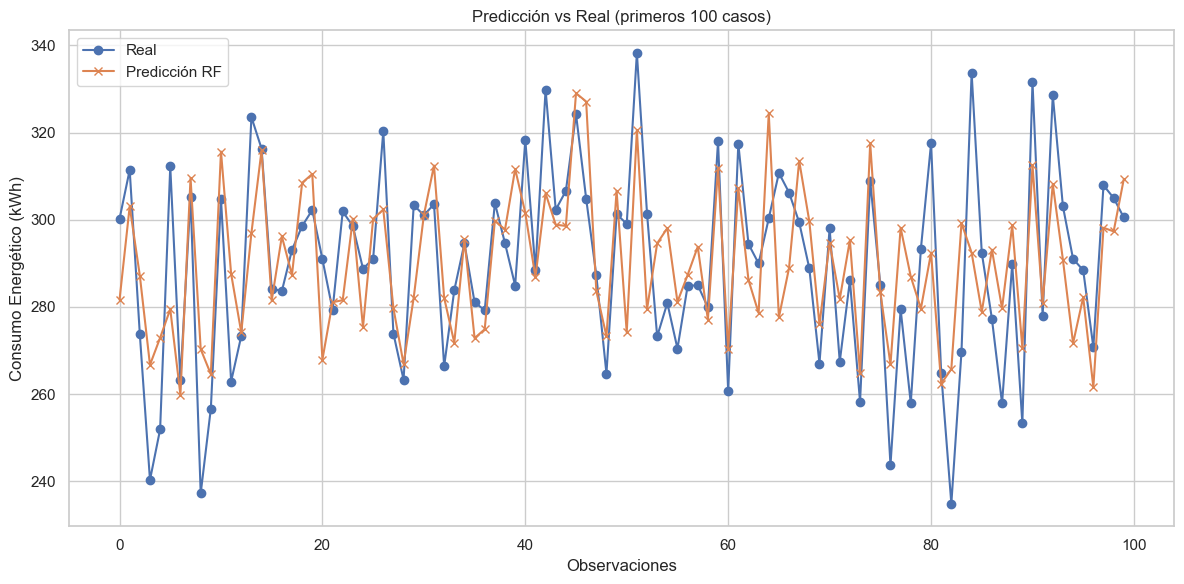

'En este proyecto se desarrolló un modelo predictivo para estimar el consumo energético en una unidad de destilación,\nutilizando variables operativas como tipo de crudo, caudal, temperaturas y presión. \nEl modelo Random Forest obtuvo mejor desempeño que la regresión lineal, con una mejor capacidad de capturar no linealidades.\nEsta herramienta puede servir para:\n- Prever el consumo energético por hora.\n- Optimizar turnos de operación.\n- Detectar ineficiencias energéticas en tiempo real.\nEl proyecto es fácilmente escalable si se integran datos reales históricos de planta.'

In [11]:
# ===========================================================
# PROYECTO: Predicción del Consumo Energético en Refinería
# AUTOR: Agustín Garibaldi
# OBJETIVO: Usar modelos de Machine Learning para predecir
#           el consumo energético horario de una unidad de destilación
# ===========================================================

# Carga de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Uso de graficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar de los datos
df = pd.read_csv("C:/Users/garib/OneDrive/Escritorio/Refineria Proyecto/consumo_energia_refineria.csv")

# Vista general
print(df.head())
print("\nResumen estadístico:\n", df.describe())
print("\nValores faltantes:\n", df.isnull().sum())

# Análisis exploratorio
# Correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Distribución del consumo
sns.histplot(df["consumo_energia_kwh"], bins=30, kde=True)
plt.title("Distribución del Consumo Energético (kWh)")
plt.show()

# Preprocesamiento
# One-hot encoding para tipo de crudo
df_encoded = pd.get_dummies(df, columns=["tipo_crudo"], drop_first=True)

# Selección de variables
X = df_encoded.drop(columns=["fecha_hora", "consumo_energia_kwh"])
y = df_encoded["consumo_energia_kwh"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos

## 🔹 Regresión Lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

## 🔸 Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación y decisión de mejor modelo
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\n📌 Evaluación de {nombre}:")
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R2:", round(r2_score(y_true, y_pred), 2))

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)

# Comparación visual
plt.plot(y_test.values[:100], label="Real", marker="o")
plt.plot(y_pred_rf[:100], label="Predicción RF", marker="x")
plt.title("Predicción vs Real (primeros 100 casos)")
plt.xlabel("Observaciones")
plt.ylabel("Consumo Energético (kWh)")
plt.legend()
plt.tight_layout()
plt.show()

# 📘 8. Conclusión 


"""En este proyecto se desarrolló un modelo predictivo para estimar el consumo energético en una unidad de destilación,
utilizando variables operativas como tipo de crudo, caudal, temperaturas y presión. 
El modelo Random Forest obtuvo mejor desempeño que la regresión lineal, con una mejor capacidad de capturar no linealidades.
Esta herramienta puede servir para:
- Prever el consumo energético por hora.
- Optimizar turnos de operación.
- Detectar ineficiencias energéticas en tiempo real.
El proyecto es fácilmente escalable si se integran datos reales históricos de planta."""

